In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

**Upload data**

In [5]:
data_agg = pd.read_csv('data_agg.csv')
data_agg

,timehour,Region,n_trips
0,2016-05-01 00:00:00,1015,1
1,2016-05-01 00:00:00,1017,1
2,2016-05-01 00:00:00,1029,3
3,2016-05-01 00:00:00,1030,1
4,2016-05-01 00:00:00,1033,4
...,...,...,...
141757,2016-05-31 23:00:00,2069,17
141758,2016-05-31 23:00:00,2070,1
141759,2016-05-31 23:00:00,2118,192
141760,2016-05-31 23:00:00,2119,77


**Trips taxi of regions on May 2016**

In [6]:
data_agg_sum = data_agg[['Region', 'n_trips']].groupby('Region').sum().reset_index()

In [7]:
data_agg_sum

,Region,n_trips
0,15,1
1,16,1
2,25,1
3,27,1
4,32,19
...,...,...
1212,2483,2
1213,2484,1
1214,2485,2
1215,2486,3


### Mean number of taxi rides per hour per month

In [8]:
region = data_agg_sum.Region.values

In [9]:
for i in range(1, 2501):
    if i not in region:
        df = pd.DataFrame([[i, 0]], columns=['Region', 'n_trips'])
        data_agg_sum = data_agg_sum.append(df)

In [10]:
data_agg_sum = data_agg_sum.sort_values(by='Region')
data_agg_sum

,Region,n_trips
0,1,0
0,2,0
0,3,0
0,4,0
0,5,0
...,...,...
0,2496,0
0,2497,0
0,2498,0
0,2499,0


In [11]:
regions = pd.read_csv('regions.csv', sep=';')
regions

,region,west,east,south,north
0,1,-74.255590,-74.244478,40.496120,40.504508
1,2,-74.255590,-74.244478,40.504508,40.512896
2,3,-74.255590,-74.244478,40.512896,40.521285
3,4,-74.255590,-74.244478,40.521285,40.529673
4,5,-74.255590,-74.244478,40.529673,40.538061
...,...,...,...,...,...
2495,2496,-73.711122,-73.700010,40.873589,40.881977
2496,2497,-73.711122,-73.700010,40.881977,40.890365
2497,2498,-73.711122,-73.700010,40.890365,40.898754
2498,2499,-73.711122,-73.700010,40.898754,40.907142


In [12]:
coordinates = []
for west, east, south, north in zip(regions.west, regions.east, regions.south, regions.north):
    coordinates.append([[west, south],
                      [west, north],
                      [east, north],
                      [east, south],
                        [west, south]])

In [13]:
regions['coordinates'] = coordinates
regions

,region,west,east,south,north,coordinates
0,1,-74.255590,-74.244478,40.496120,40.504508,"[[-74.25559, 40.49612], [-74.25559, 40.5045082..."
1,2,-74.255590,-74.244478,40.504508,40.512896,"[[-74.25559, 40.504508200000004], [-74.25559, ..."
2,3,-74.255590,-74.244478,40.512896,40.521285,"[[-74.25559, 40.512896399999995], [-74.25559, ..."
3,4,-74.255590,-74.244478,40.521285,40.529673,"[[-74.25559, 40.5212846], [-74.25559, 40.52967..."
4,5,-74.255590,-74.244478,40.529673,40.538061,"[[-74.25559, 40.52967279999999], [-74.25559, 4..."
...,...,...,...,...,...,...
2495,2496,-73.711122,-73.700010,40.873589,40.881977,"[[-73.71112159999998, 40.873589], [-73.7111215..."
2496,2497,-73.711122,-73.700010,40.881977,40.890365,"[[-73.71112159999998, 40.88197720000001], [-73..."
2497,2498,-73.711122,-73.700010,40.890365,40.898754,"[[-73.71112159999998, 40.8903654], [-73.711121..."
2498,2499,-73.711122,-73.700010,40.898754,40.907142,"[[-73.71112159999998, 40.8987536], [-73.711121..."


In [14]:
longs = np.unique(regions[['west', 'east']].values)
lats = np.unique(regions[['south', 'north']].values)
lon, lat = np.meshgrid(longs, lats)

In [15]:
ny_lon_west = -74.25559 # longitude and latitude of map New York
ny_lon_east = -73.70001
ny_lat_north = 40.91553
ny_lat_south = 40.49612

lat_ESB = 40.748433 # longitude and latitude of the Empire State Building
lon_ESB = -73.985656
name = 'Empire State Building'

**New York static map**


In [16]:
n_trips = data_agg_sum.n_trips.to_numpy()
n_trips

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

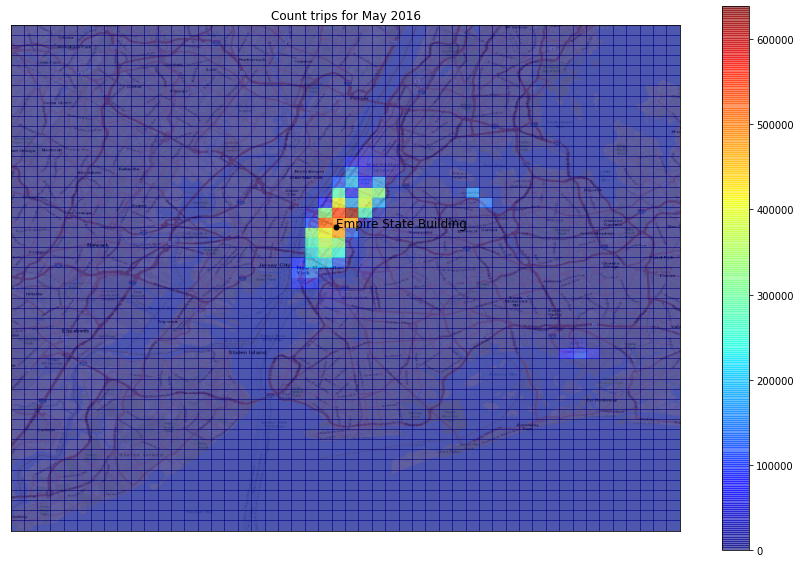

In [39]:
plt.figure(figsize=(15, 10))
ny_map = Basemap(llcrnrlat= ny_lat_south, llcrnrlon= ny_lon_west, 
              urcrnrlat= ny_lat_north, urcrnrlon= ny_lon_east,
              resolution='f', projection='lcc',
              lat_0 = (ny_lat_north + ny_lat_north)/2.0,
              lon_0 = (ny_lon_west + ny_lon_east)/2.0, epsg=4326)

ny_map.arcgisimage(service='World_Street_Map', xpixels=1024, epsg=4269)

x, y = ny_map(lon_ESB, lat_ESB)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, name, fontsize=12);
plt.title('Count trips for May 2016')


ny_map.pcolormesh(lon, lat, n_trips.reshape(50,50).transpose(), latlon=True, cmap= 'jet', alpha = 0.6)
plt.colorbar()
plt.show()

In [17]:
import json
import plotly.express as px
import plotly.graph_objects as go

from geojson import Feature, FeatureCollection, Polygon, dump

**Create file geojson for plot map**

In [18]:
polygonfeatures = []
for region, coor in zip(regions.region, regions.coordinates):
    polygon = Polygon([coor])
    polygonjson = Feature(geometry=polygon, id=region, properties={"name":'reg {}'.format(str(region))})
    polygonfeatures.append(polygonjson)
    
feature_collection = FeatureCollection(polygonfeatures)

with open('region.json', 'w') as f:
    dump(feature_collection, f)

**Filter the regions that make less than 5 trips per hour on average in may 2016**

In [19]:
from calendar import monthrange
mean_hour = []
for n_trip in data_agg_sum.n_trips:
    if n_trip < 5:
        mean_hour.append(0)
    else:
        mean_hour.append(round(n_trip/(monthrange(2016, 5)[1]*24)))

data_agg_sum['mean_hour'] = mean_hour
data_agg_sum

,Region,n_trips,mean_hour
0,1,0,0
0,2,0,0
0,3,0,0
0,4,0,0
0,5,0,0
...,...,...,...
0,2496,0,0
0,2497,0,0
0,2498,0,0
0,2499,0,0


**Number of regions have trips >= 5**

In [20]:
print('Number of regions:',len(data_agg_sum[data_agg_sum.mean_hour > 0]))

Number of regions: 198


In [24]:
with open('region.json', 'r') as f:
    geodata = json.load(f)

### Ploting an interactive map of new York (see on ny_map.html)

In [26]:
lat_SL = 40.689247 # longitude and latitude of The Statue of Liberty National Monument
lon_SL = -74.044502

ny_map = px.choropleth_mapbox(data_agg_sum, geojson=geodata, locations='Region', color='mean_hour',
                           color_continuous_scale="Viridis",
                           range_color=(0, max(mean_hour)),
                           mapbox_style="carto-positron",
                           zoom=9, center = {"lat": lat_SL, "lon": lon_SL},
                           opacity=0.5,
                           labels={'mean_hour':'trips/hour'}
                          )

ny_map.add_trace(go.Scattermapbox(
        lat=[str(lat_SL)],
        lon=[str(lon_SL)],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=10,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=['The Statue of Liberty National Monument']
    ))
ny_map.update_layout(title='Mean count for trips on May 2016')
ny_map.show()


ny_map.write_html('ny_map.html') # In file <notebook>.html not show ny_map, you can open file ny_map.html